## Dataset Information

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for homeloan after that company validates the customers eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. these details are Gender, Marital status, education, Number fo departments, income, Loan amount, Credit History and other features. TO automate this process. they have given a problem to identify the customer segments, those are eligibel for loan amount so that they can specifically target these customers.

This is a standard supervised classification task. A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.


Variable                                     Description
0             Loan_ID                                  Unique Loan ID
1              Gender                                     Male/Female
2             Married                           Appicant married(Y/N)
3         Departments                           Number of departments
4           Education  Applicant Education (Graduate/ Under Graduate)
5       Self_Employed                              Self employed(Y/N)
6     ApplicantIncome                                Applicant income
7   CoapplicantIncome                              Coapplicant income
8          LoanAmount                        Loan amount in thousants
9    Loan_Amount_Term                          Term of loan in months
10     Credit_History                  Credit history meets guidlines
11      Property_Area                         Urban/Semi Urban/ Rural
12        Loan_Status                              Loan approved(Y/N)

In [1]:
import pandas as pd
data= {'Variable': ['Loan_ID', 'Gender', 'Married', 'Departments', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area',	'Loan_Status'],
'Description': ['Unique Loan ID', 'Male/Female', 'Appicant married(Y/N)', 'Number of departments', 'Applicant Education (Graduate/ Under Graduate)', 'Self employed(Y/N)','Applicant income', 'Coapplicant income', 'Loan amount in thousants', 'Term of loan in months', 'Credit history meets guidlines','Urban/Semi Urban/ Rural', 'Loan approved(Y/N)']}

df=pd.DataFrame(data)
print(df)

             Variable                                     Description
0             Loan_ID                                  Unique Loan ID
1              Gender                                     Male/Female
2             Married                           Appicant married(Y/N)
3         Departments                           Number of departments
4           Education  Applicant Education (Graduate/ Under Graduate)
5       Self_Employed                              Self employed(Y/N)
6     ApplicantIncome                                Applicant income
7   CoapplicantIncome                              Coapplicant income
8          LoanAmount                        Loan amount in thousants
9    Loan_Amount_Term                          Term of loan in months
10     Credit_History                  Credit history meets guidlines
11      Property_Area                         Urban/Semi Urban/ Rural
12        Loan_Status                              Loan approved(Y/N)


#### IMPORT ALL REQ. LIBRARIES.

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

%matplotlib inline

In [3]:
df=pd.read_csv(r"F:\Loan-Prediction-Analysis - ML\train_loan_approval.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### FIND ALL STATISTICAL VALUES:

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.shape  # shape of the data

(614, 13)

#### we have 614 rows and 13 features.

In [6]:
df.info() # details of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Data preprocessing / find null values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# fill the missing vlaues for numerical terms--mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] =df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
df['Gender'].mode()[0]

'Male'

In [10]:
# fill the missing vlaues for categorical terms--mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Exploratory Data Analysis
#### categorical visualization

C:\Users\mobin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

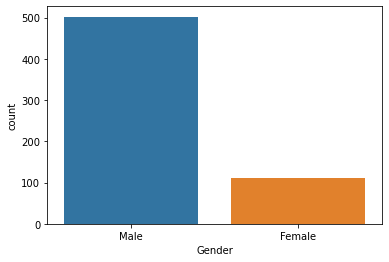

In [12]:
sns.countplot(df['Gender'])

C:\Users\mobin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

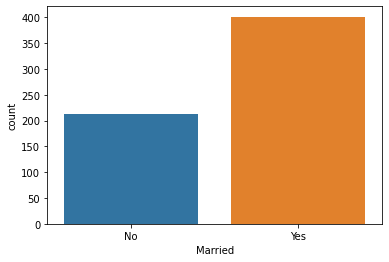

In [13]:
sns.countplot(df['Married'])

C:\Users\mobin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

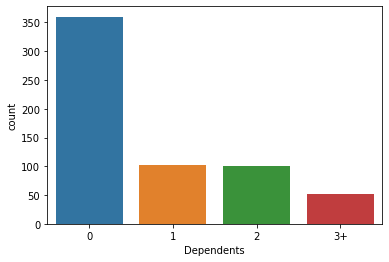

In [14]:
sns.countplot(df['Dependents'])

C:\Users\mobin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

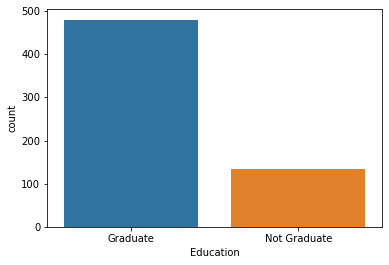

In [15]:
sns.countplot(df['Education'])

C:\Users\mobin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

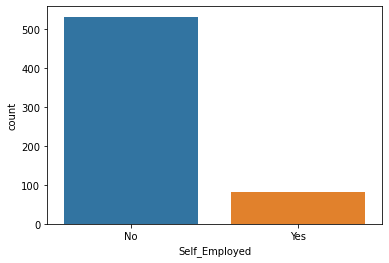

In [16]:
sns.countplot(df['Self_Employed'])

C:\Users\mobin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

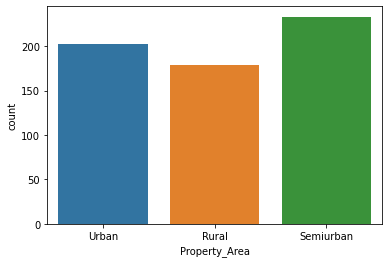

In [17]:
sns.countplot(df['Property_Area'])

C:\Users\mobin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

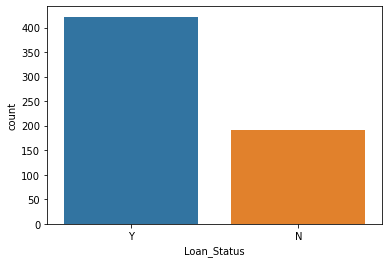

In [18]:
sns.countplot(df['Loan_Status'])

#### numerical attributes visualization

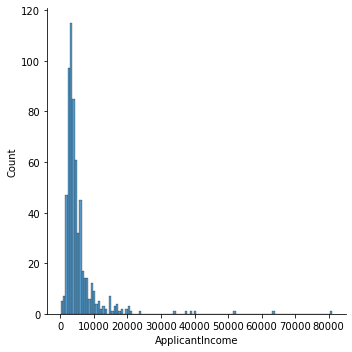

In [19]:
sns.displot(df['ApplicantIncome'])

In [20]:
# apply log transformation to the attribute / for normal distribution
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

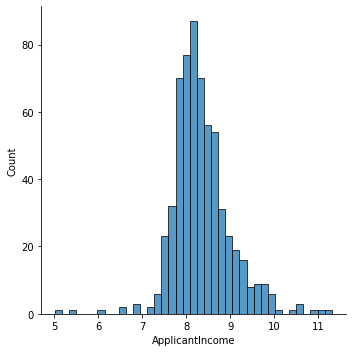

In [21]:
sns.displot(df['ApplicantIncome'])

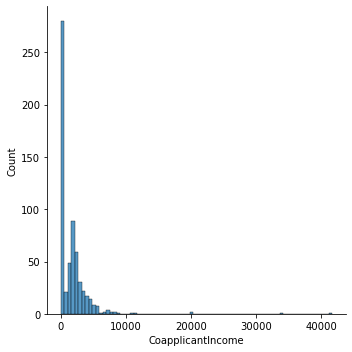

In [22]:
sns.displot(df['CoapplicantIncome'])

In [23]:
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

C:\Users\mobin\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


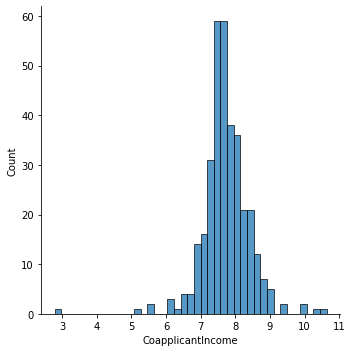

In [24]:
sns.displot(df['CoapplicantIncome'])

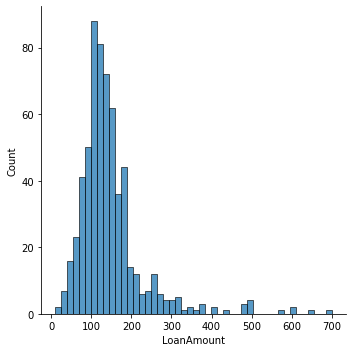

In [25]:
sns.displot(df['LoanAmount'])

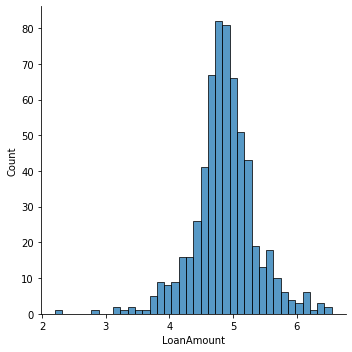

In [26]:
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.displot(df['LoanAmount'])

C:\Users\mobin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

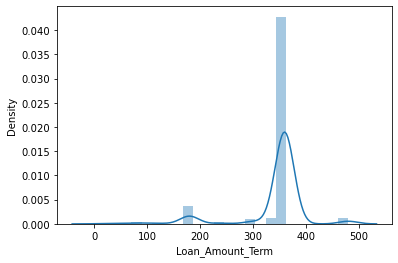

In [27]:
sns.distplot(df['Loan_Amount_Term'])

C:\Users\mobin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

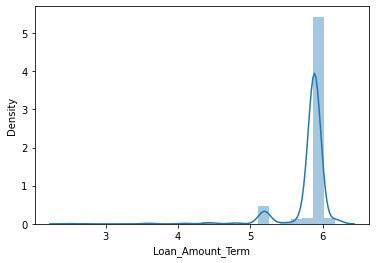

In [28]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term'])


C:\Users\mobin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

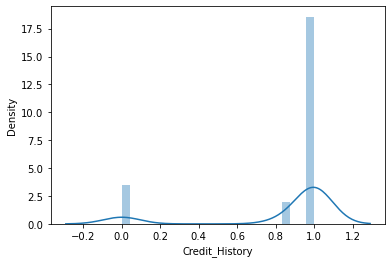

In [29]:
sns.distplot(df['Credit_History'])


#### Creation of new attributes

In [30]:
# total income
df['Total_Income'] = df['ApplicantIncome']+ df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,Y,-inf
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,N,15.748649
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,Y,-inf
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,Y,15.622276
4,LP001008,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,Y,-inf


#### apply log transformation to the attribute

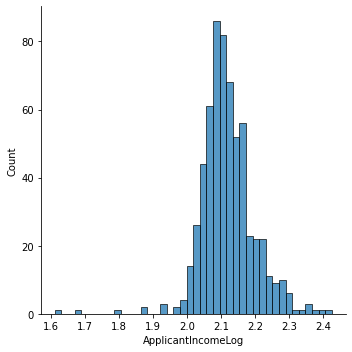

In [31]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.displot(df['ApplicantIncomeLog'])

C:\Users\mobin\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


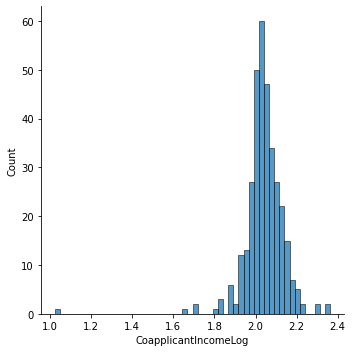

In [32]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.displot(df['CoapplicantIncomeLog'])

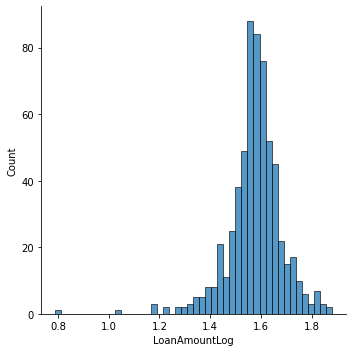

In [33]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.displot(df['LoanAmountLog'])

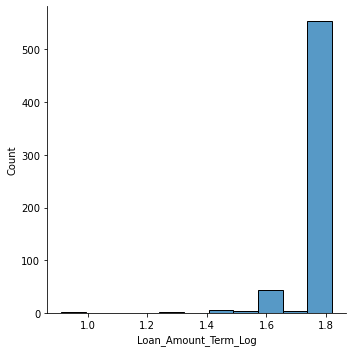

In [34]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.displot(df['Loan_Amount_Term_Log'])

C:\Users\mobin\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


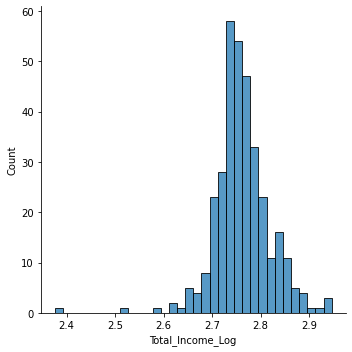

In [35]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.displot(df['Total_Income_Log'])

In [36]:
df['Total_Income_Log']= df['Total_Income_Log'].fillna(df['Total_Income_Log'].mean())
df["Total_Income_Log"]

0      2.761524
1      2.756755
2      2.761524
3      2.748698
4      2.761524
         ...   
609    2.761524
610    2.761524
611    2.672547
612    2.761524
613    2.761524
Name: Total_Income_Log, Length: 614, dtype: float64

#### Coorelation Matrix

<AxesSubplot:>

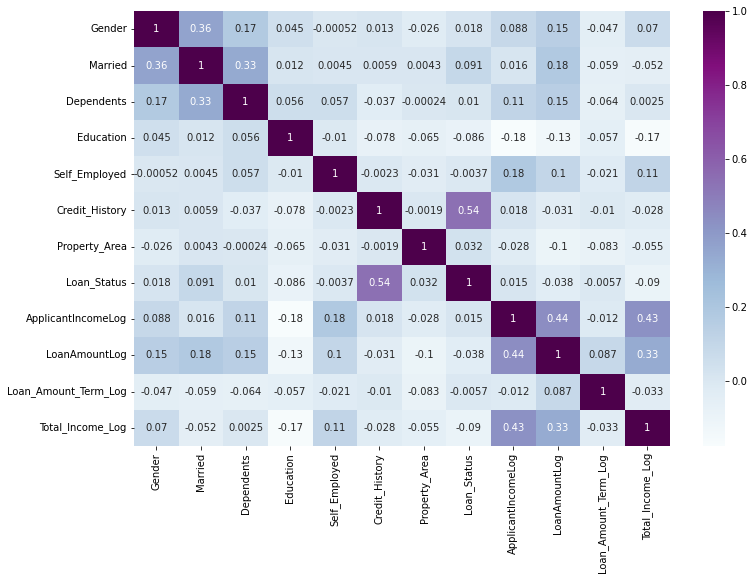

In [68]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="BuPu")

In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,Y,-inf,2.160333,NaN,1.606719,1.772594,2.761524
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,N,15.748649,2.131810,1.990411,1.579397,1.772594,2.756755
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,Y,-inf,2.080237,NaN,1.432618,1.772594,2.761524
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,Y,15.622276,2.061368,2.049700,1.566007,1.772594,2.748698
4,LP001008,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,Y,-inf,2.163267,NaN,1.599137,1.772594,2.761524


#### drop unneccessary columns

In [39]:
cols= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income','CoapplicantIncomeLog','Loan_ID']
df=df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,2.160333,1.606719,1.772594,2.761524
1,Male,Yes,1,Graduate,No,1.0,Rural,N,2.131810,1.579397,1.772594,2.756755
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.080237,1.432618,1.772594,2.761524
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2.061368,1.566007,1.772594,2.748698
4,Male,No,0,Graduate,No,1.0,Urban,Y,2.163267,1.599137,1.772594,2.761524


#### Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
cols= ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le= LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,2.160333,1.606719,1.772594,2.761524
1,1,1,1,0,0,1.0,0,0,2.131810,1.579397,1.772594,2.756755
2,1,1,0,0,1,1.0,2,1,2.080237,1.432618,1.772594,2.761524
3,1,1,0,1,0,1.0,2,1,2.061368,1.566007,1.772594,2.748698
4,1,0,0,0,0,1.0,2,1,2.163267,1.599137,1.772594,2.761524


In [42]:
df.isnull().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
Credit_History          0
Property_Area           0
Loan_Status             0
ApplicantIncomeLog      0
LoanAmountLog           0
Loan_Amount_Term_Log    0
Total_Income_Log        0
dtype: int64

In [43]:
# specify input and output attributes
X=df.drop(columns=['Loan_Status'], axis=1)
y=df['Loan_Status']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

#### Model Training

In [49]:
# Classifiy function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    x_train,x_test, y_train, y_test= train_test_split(X, y, test_size=0.25,random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy is', model.score(x_test,y_test)*100)
    # cross validation- it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score= cross_val_score(model,X,y, cv=5)
    print("Cross validation is" , np.mean(score)*100)

In [50]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model,X,y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [51]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model, X,y)

Accuracy is 70.12987012987013
Cross validation is 70.19858723177396


In [52]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model= RandomForestClassifier()
classify(model, X,y)

Accuracy is 79.22077922077922
Cross validation is 78.99506863921097


In [53]:
model= ExtraTreesClassifier()
classify(model, X,y)

Accuracy is 74.02597402597402
Cross validation is 76.38411302145808


## Hyperparameter Tuning

In [59]:
model= RandomForestClassifier(n_estimators=100, min_samples_split= 25, max_depth=7, max_features=1)
classify(model, X,y)

Accuracy is 76.62337662337663
Cross validation is 80.13061442089831


## Confusion Matrix

#### A confusion matrix is a summary of prediction results on a classification problem. the number of correct and incorrect predictions are summarized with count values and broken down by each class. it gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [62]:
model= RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
from sklearn.metrics import confusion_matrix
y_pred= model.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 4, 96]], dtype=int64)

<AxesSubplot:>

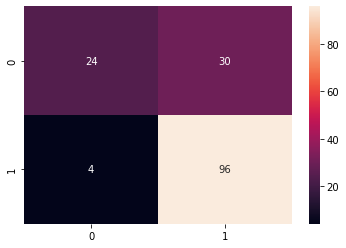

In [64]:
sns.heatmap(cm, annot=True)